In [3]:
import ibm_db

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=hpf03826;PWD=3s4753llb92^1slm;


In [6]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected!")

except:
    print ("Unable to connect to database")

Connected!


In [7]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

In [8]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)

In [9]:
#Construct the query - replace ... with the insert statement

insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [10]:
#Construct the query - replace ... with the insert statement

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"

#execute the insert statement
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [11]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only) - replace ... with your code
ibm_db.fetch_both(selectStmt)


{0: 1,
 1: 'Rav',
 2: 'Ahuja',
 3: 'TORONTO',
 'FNAME': 'Rav',
 'CITY': 'TORONTO',
 'LNAME': 'Ahuja',
 'ID': 1,
 4: 'CA',
 'CCODE': 'CA'}

In [12]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 2  FNAME: Raul
 ID: 3  FNAME: Hima


In [13]:

updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

In [14]:
import pandas
import ibm_db_dbi

In [15]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [16]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

'Ahuja'

In [17]:
pdf.shape

(3, 5)

In [18]:
# close the connection
ibm_db.close(conn)

True

### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.

In [19]:
!pip install --user ipython-sql
!pip install --user ibm_db
!pip install --user ibm_db_sa

Requirement not upgraded as not directly required: ipython-sql in /home/dsxuser/.local/lib/python3.5/site-packages
Requirement not upgraded as not directly required: sqlparse in /home/dsxuser/.local/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly required: prettytable in /home/dsxuser/.local/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly required: sqlalchemy>=0.6.7 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly required: ipython-genutils>=0.1.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly required: ipython>=1.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ipython-sql)
Requirement not upgraded as not directly 

In [20]:
%load_ext sql

In [21]:
# The code was removed by Watson Studio for sharing.

'Connected: hpf03826@BLUDB'

In [22]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "HPF03826.INTERNATIONAL_STUDENT_TEST_SCORES" of type "TABLE".  SQLSTATE=42710 SQLCODE=-601 [SQL: 'CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (\n\tcountry VARCHAR(50),\n\tfirst_name VARCHAR(50),\n\tlast_name VARCHAR(50),\n\ttest_score INT\n);']


### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.

For example, if I have a python variable country with a value of "Canada", I can use this variable in a SQL query to find all the rows of students from Canada.

In [23]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [24]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


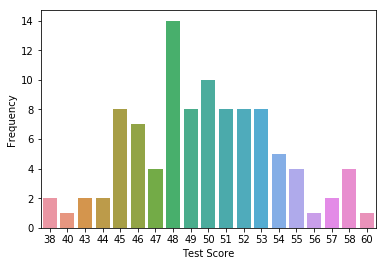

In [25]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
import seaborn

plot = seaborn.barplot(x='Test Score',y='Frequency', data=dataframe)

In [26]:
%sql SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


# Project Introduction

Using this Python notebook to:

Understand 3 Chicago datasets
Load the 3 datasets into 3 tables in a Db2 database
Execute SQL queries to answer assignment questions
Understand the datasets

To complete the assignment problems in this notebook you will be using three datasets that are available on the city of Chicago's Data Portal:

Socioeconomic Indicators in Chicago
Chicago Public Schools
Chicago Crime Data
1. Socioeconomic Indicators in Chicago

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

For this assignment you will use a snapshot of this dataset which can be downloaded from: https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

2. Chicago Public Schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

For this assignment you will use a snapshot of this dataset which can be downloaded from: https://ibm.box.com/shared/static/0g7kbanvn5l2gt2qu38ukooatnjqyuys.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

3. Chicago Crime Data

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

This dataset is quite large - over 1.5GB in size with over 6.5 million rows. For the purposes of this assignment we will use a much smaller sample of this dataset which can be downloaded from: https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

Store the datasets in database tables

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the **IBM DB2 database**.



In [ ]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

In [28]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 10;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3
5,6.0,Lake View,5.0,60058,4.7,2.6,17.0,11.4,1.1
6,7.0,Lincoln Park,2.0,71551,5.1,3.6,21.5,12.3,0.8
7,8.0,Near North Side,1.0,88669,7.0,2.5,22.6,12.9,1.9
8,9.0,Edison Park,8.0,40959,6.5,7.4,35.3,3.3,1.1
9,10.0,Norwood Park,21.0,32875,9.0,11.5,39.5,5.4,2.0


In [29]:
%sql SELECT COUNT(*) Total FROM chicago_socioeconomic_data;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


total
78


In [30]:
%sql SELECT COUNT(*) High_hardship_total FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


high_hardship_total
38


In [31]:
%sql SELECT MAX(hardship_index) Max_hardship FROM chicago_socioeconomic_data;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


max_hardship
98.0


In [32]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC nulls last LIMIT 1;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [33]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [34]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_>60000;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


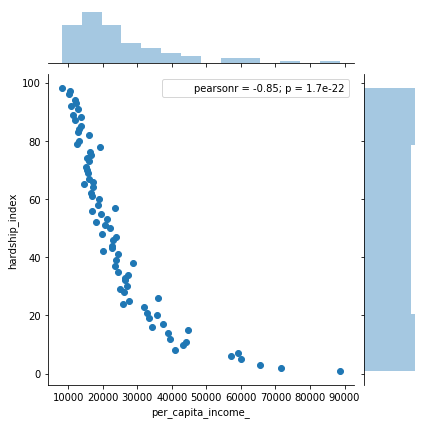

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

In [36]:
%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
HPF03826,SCHOOLS,HPF03826,U,T,N,None,None,None,None,2018-09-02 23:10:32.208928,2018-09-02 23:10:32.208928,2018-09-02 23:10:32.208928,2018-09-02 23:20:23.519409,79,12,864,566,15,0,16,-1,-1,-1,0,hpf03826space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,850,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2018-09-02 23:10:32.208928,0,,None,None,N,HPF03826,,,,2018-09-02,,N,R,N,-1.0,None


In [37]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABSCHEMA = 'hpf03826'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time


In [38]:
# count the number of columns

%sql select count(*) num_of_columns from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


num_of_columns
79


In [39]:
# retrieve column names, datatype, and length
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


colname,typename,length
School_ID,INTEGER,4
Name_of_School,VARCHAR,65
"Elementary, Middle, or High School",VARCHAR,2
Street_Address,VARCHAR,30
City,VARCHAR,7
State,VARCHAR,2
ZIP_Code,INTEGER,4
Phone_Number,VARCHAR,14
Link,VARCHAR,78
Network_Manager,VARCHAR,40


In [40]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CENSUS_DATA'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


colname,typename,length
COMMUNITY_AREA_NAME,VARCHAR,22
PERCENT_OF_HOUSING_CROWDED,DECIMAL,4
PERCENT_HOUSEHOLDS_BELOW_POVERTY,DECIMAL,4
PERCENT_AGED_16__UNEMPLOYED,DECIMAL,4
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,DECIMAL,4
PERCENT_AGED_UNDER_18_OR_OVER_64,DECIMAL,4
PER_CAPITA_INCOME,INTEGER,4
HARDSHIP_INDEX,SMALLINT,2
Community_Area_Number,SMALLINT,2


In [41]:
# how many elementary schools
%sql select count(*) Total_num_of_ES from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


total_num_of_es
462


In [42]:
# What is the highest safefy score?
%sql SELECT MAX("Safety_Score") MAX_SAFETY_SCORE FROM SCHOOLS

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


max_safety_score
99


In [43]:
%sql SELECT "Name_of_School","Safety_Score" FROM SCHOOLS WHERE "Safety_Score"=99;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Safety_Score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [44]:
%sql SELECT "Name_of_School","Average_Student_Attendance" FROM SCHOOLS ORDER BY "Average_Student_Attendance" DESC nulls last LIMIT 10

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
John Charles Haines Elementary School,98.4%
James Ward Elementary School,97.8%
Edgar Allan Poe Elementary Classical School,97.6%
Orozco Fine Arts & Sciences Elementary School,97.6%
Rachel Carson Elementary School,97.6%
Annie Keller Elementary Gifted Magnet School,97.5%
Andrew Jackson Elementary Language Academy,97.4%
Lenart Elementary Regional Gifted Center,97.4%
Disney II Magnet School,97.3%
John H Vanderpoel Elementary Magnet School,97.2%


In [45]:
%sql SELECT "Name_of_School","Average_Student_Attendance" FROM SCHOOLS ORDER BY "Average_Student_Attendance" nulls last LIMIT 5

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
Richard T Crane Technical Preparatory High School,57.9%
Barbara Vick Early Childhood & Family Center,60.9%
Dyett High School,62.5%
Wendell Phillips Academy High School,63.0%
Orr Academy High School,66.3%


In [46]:
%sql SELECT "Name_of_School",REPLACE("Average_Student_Attendance",'%','') FROM SCHOOLS ORDER BY "Average_Student_Attendance" nulls last LIMIT 5

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,2
Richard T Crane Technical Preparatory High School,57.9
Barbara Vick Early Childhood & Family Center,60.9
Dyett High School,62.5
Wendell Phillips Academy High School,63.0
Orr Academy High School,66.3


In [47]:
%sql SELECT "Name_of_School","Average_Student_Attendance" FROM SCHOOLS WHERE "Average_Student_Attendance"<'70%' ORDER BY "Average_Student_Attendance";

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Name_of_School,Average_Student_Attendance
Richard T Crane Technical Preparatory High School,57.9%
Barbara Vick Early Childhood & Family Center,60.9%
Dyett High School,62.5%
Wendell Phillips Academy High School,63.0%
Orr Academy High School,66.3%
Manley Career Academy High School,66.8%
Chicago Vocational Career Academy High School,68.8%
Roberto Clemente Community Academy High School,69.6%


In [48]:
%sql SELECT "Community_Area_Name", sum("College_Enrollment__number_of_students_") Total_Enrollment FROM SCHOOLS GROUP BY "Community_Area_Name"

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,total_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


In [49]:
%sql SELECT "Community_Area_Name", sum("College_Enrollment__number_of_students_") \
Total_Enrollment FROM SCHOOLS GROUP BY "Community_Area_Name" \
ORDER BY 2 ASC LIMIT 5

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,total_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [50]:
# Rows in Census Data (Socieconimic Indicators)
%sql SELECT count(*) num_of_rows FROM CENSUS_DATA;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


num_of_rows
78


In [51]:
# Rows in Public Schools
%sql SELECT count(*) num_of_rows FROM schools;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


num_of_rows
566


In [52]:
# Rows in Crime Data
%sql SELECT count(*) num_of_rows FROM chicago_crime_data;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


num_of_rows
533


In [53]:
# Find average college enrollments by community area
%sql SELECT "Community_Area_Name", avg("College_Enrollment__number_of_students_") Avg_Enrollment \
FROM SCHOOLS GROUP BY "Community_Area_Name";

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,avg_enrollment
ALBANY PARK,858.000000
ARCHER HEIGHTS,2411.500000
ARMOUR SQUARE,486.000000
ASHBURN,810.375000
AUBURN GRESHAM,417.500000
AUSTIN,475.347826
AVALON PARK,507.333333
AVONDALE,910.000000
BELMONT CRAGIN,1198.833333
BEVERLY,409.000000


In [54]:
# Find the number of schools that are healthy school certified
%sql SELECT count(*) Total_health_certified_school FROM schools \
Where "Healthy_Schools_Certified_" = 'Yes';

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


total_health_certified_school
16


In [55]:
# How many observations have a Location Description value of GAS STATION
%sql SELECT count(*) Total_gas_station_crime FROM chicago_crime_data \
Where "Location_Description" = 'GAS STATION';

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


total_gas_station_crime
6


In [56]:
#Retrieve a list of the top 10 community areas which have most number of schools and sorted in descending order
%sql SELECT  "Community_Area_Name", count("Name_of_School") Total_schools \
FROM schools GROUP BY "Community_Area_Name" \
ORDER BY 2 DESC \
nulls last LIMIT 10;

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,total_schools
AUSTIN,23
SOUTH LAWNDALE,22
WEST TOWN,20
ENGLEWOOD,17
NEAR WEST SIDE,16
NORTH LAWNDALE,16
EAST GARFIELD PARK,13
HUMBOLDT PARK,13
NEW CITY,13
ROSELAND,13


In [57]:
# How many observations have value MOTOR VEHICLE THEFT in the Primary Type variable
%sql SELECT count(*) num_of_motovehicle_theft_crime FROM chicago_crime_data \
Where "Primary_Type" = 'MOTOR VEHICLE THEFT';

 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


num_of_motovehicle_theft_crime
24


In [58]:
# Find the minimum “Average Student Attendance” for community are where hardship is 96. Hint: use INNER JOIN
%sql SELECT S."Community_Area_Name", S."Average_Student_Attendance" \
FROM schools AS S \
INNER JOIN CENSUS_DATA AS C ON UPPER(C."COMMUNITY_AREA_NAME") = S."Community_Area_Name"  \
WHERE C."HARDSHIP_INDEX"=96.0 \
ORDER BY 2 \
LIMIT 1



 * ibm_db_sa://hpf03826:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


Community_Area_Name,Average_Student_Attendance
SOUTH LAWNDALE,86.1%
